<a href="https://colab.research.google.com/github/RohanK22/trading-bot/blob/main/LSTM_Stock_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Ref: https://www.kdnuggets.com/2018/11/keras-long-short-term-memory-lstm-model-predict-stock-prices.html
!pip install yfinance

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

In [ ]:
STOCK = 'GOOGL'
PERIOD = '5d'
INTERVAL = '1m'
EPOCHS = 100
lookback_days = 60

# Loading the data
dataset_train = yf.download(tickers=STOCK, period=PERIOD, interval=INTERVAL)
training_set = dataset_train.iloc[:, 1:2].values
dataset_train
# print(training_set.shape)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2021-07-12 09:30:00-04:00,2523.560059,2523.560059,2516.050049,2518.037598,2518.037598,37768
2021-07-12 09:31:00-04:00,2520.544922,2520.544922,2516.909912,2518.125000,2518.125000,4233
2021-07-12 09:32:00-04:00,2518.270996,2519.659912,2517.395020,2517.395020,2517.395020,3088
2021-07-12 09:33:00-04:00,2516.310059,2518.300049,2516.129883,2517.064941,2517.064941,3615
2021-07-12 09:34:00-04:00,2517.669922,2518.399902,2516.110107,2517.614990,2517.614990,4035
...,...,...,...,...,...,...
2021-07-16 15:55:00-04:00,2541.050049,2542.050049,2540.429932,2541.479980,2541.479980,8087
2021-07-16 15:56:00-04:00,2541.215088,2541.215088,2539.520020,2539.520020,2539.520020,6381
2021-07-16 15:57:00-04:00,2539.250000,2539.870117,2538.840088,2539.320068,2539.320068,10496


In [ ]:
# Using feature scaling for better model performace
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# Preparing Training data
X_train = []
y_train = []
for i in range(lookback_days, len(training_set_scaled)):
    X_train.append(training_set_scaled[i - lookback_days : i , 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(1706, 60, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
# Build model and train 
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = EPOCHS, batch_size = 32)

Epoch 1/100
54/54 [==============================] - 6s 14ms/step - loss: 0.0628
Epoch 2/100
54/54 [==============================] - 1s 12ms/step - loss: 0.0079
Epoch 3/100
54/54 [==============================] - 1s 12ms/step - loss: 0.0062
Epoch 4/100
54/54 [==============================] - 1s 13ms/step - loss: 0.0058
Epoch 5/100
54/54 [==============================] - 1s 12ms/step - loss: 0.0054
Epoch 6/100
54/54 [==============================] - 1s 12ms/step - loss: 0.0054
Epoch 7/100
54/54 [==============================] - 1s 13ms/step - loss: 0.0043
Epoch 8/100
54/54 [==============================] - 1s 12ms/step - loss: 0.0046
Epoch 9/100
54/54 [==============================] - 1s 12ms/step - loss: 0.0037
Epoch 10/100
54/54 [==============================] - 1s 13ms/step - loss: 0.0038
Epoch 11/100
54/54 [==============================] - 1s 12ms/step - loss: 0.0045
Epoch 12/100
54/54 [==============================] - 1s 13ms/step - loss: 0.0038
Epoch 13/100
54/54 [=====

(1766, 60, 1)
1766  1766


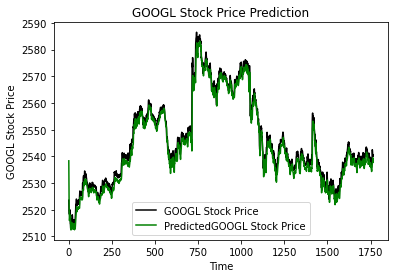

In [ ]:
# Testing on training set
dataset_test = dataset_train # yf.download(tickers='AAPL', period='1y', interval='1d') #pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - lookback_days:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(lookback_days, len(inputs)):
    X_test.append(inputs[i-lookback_days:i, 0])
# X_test.append(inputs[len(inputs) - lookback_days:len(inputs), 0])
# X_test.append(inputs[len(inputs) - lookback_days:len(inputs), 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_test.shape)

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

print(str(len(real_stock_price)) + '  ' + str(len(predicted_stock_price)))
# print(predicted_stock_price)

plt.plot(real_stock_price, color = 'black', label = STOCK+' Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted'+STOCK+' Stock Price')
plt.title(STOCK+' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(STOCK+' Stock Price')
plt.legend()
plt.show()


In [ ]:
# Predicting price on a particular day beyond given bounds
days_ahead = 50
c = 0
nDatapoints = len(dataset_test)

print(X_train.shape[1])
X_test = []
X_test.append(dataset_test.iloc[nDatapoints - lookback_days + c: nDatapoints + c, 1:2].values) # Get the last few datapoints needed for future predictions
X_test = np.array(X_test)

last_known_price = predicted_stock_price[-1][0]
predictions = []
predicted_price_change = []

while c < days_ahead: 
  if c != 0:
    X_test = np.expand_dims(np.expand_dims(np.append(X_test[0], predicted_price_day), axis=1), axis=0)
    
  # print(X_test)
  
  X_test = X_test[-lookback_days:]
  temp = X_test.copy()
  temp[0] = sc.transform(temp[0])
  predicted_price_day = regressor.predict(temp)
  predicted_price_day = sc.inverse_transform(predicted_price_day)
  # print('Pred: ' + str(predicted_price_day))
  
  predictions.append(predicted_price_day[0][0])
  predicted_price_change.append((predicted_price_day[0][0] - last_known_price)/(last_known_price) * 100)
  c += 1

print('Predicted Price in the coming ' + str(days_ahead) + ' days = ' + str(predictions))
print('Predicted Price Change in the coming ' + str(days_ahead) + ' days = ' + str(predicted_price_change))

60
Predicted Price in the coming 50 days = [2538.7659, 2537.5688, 2536.316, 2535.0835, 2533.9055, 2532.7817, 2531.705, 2530.6665, 2529.6592, 2528.6768, 2527.715, 2526.7712, 2525.8425, 2524.928, 2524.0266, 2523.1375, 2522.2607, 2521.3967, 2520.5457, 2519.709, 2518.8867, 2518.0806, 2517.2913, 2516.52, 2515.7676, 2515.035, 2514.3228, 2513.6318, 2512.9624, 2512.315, 2511.6897, 2511.0864, 2510.505, 2509.945, 2509.407, 2508.8896, 2508.393, 2507.9165, 2507.4595, 2507.0212, 2506.6013, 2506.1995, 2505.8145, 2505.4463, 2505.0938, 2504.7566, 2504.4343, 2504.126, 2503.8313, 2503.5498]
Predicted Price Change in the coming 50 days = [0.03984744835179299, -0.007321078737732023, -0.056692661019042134, -0.10525614488869905, -0.15167428646236658, -0.19595669582486153, -0.2383823972195387, -0.2793073421344161, -0.3190008457750082, -0.35771310795098543, -0.39560762234032154, -0.4327998496592045, -0.46939561143517494, -0.5054334178566933, -0.5409517325460911, -0.5759890191257, -0.6105356384068727, -0.64458

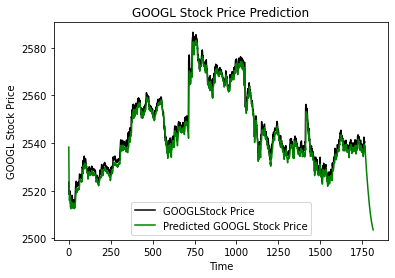

In [ ]:
# Plot predicted price 
plt.plot(real_stock_price, color = 'black', label = (STOCK + 'Stock Price'))
plt.plot(np.append(predicted_stock_price, np.expand_dims(predictions, axis = 1)), color = 'green', label = 'Predicted ' + STOCK + ' Stock Price')
plt.title(STOCK+' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(STOCK+' Stock Price')
plt.legend()
plt.show()


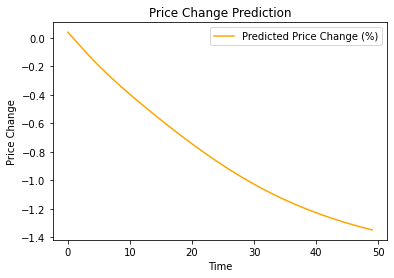

In [ ]:
# Plot predicted price change in upcoming days
plt.plot(predicted_price_change, color = 'orange', label = 'Predicted Price Change (%)')
plt.title('Price Change Prediction')
plt.xlabel('Time')
plt.ylabel('Price Change')
plt.legend()
plt.show()